<a href="https://colab.research.google.com/github/pedrosampaio1/EDA_projects/blob/main/EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de dados


#Importação das Biblotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Conhecer a base de dados

In [3]:
#Base de dados das notas do TMDB
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv')
notas.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [5]:
#Base de dados do filmes do TMDB
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
filmes.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [7]:
#Alterando o nome das colunas de notas para nomes em português
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
#Alterando o nome das colunas de notas para nomes em português
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


###Podemos ver que no dataframe de notas temos as notas dos filmes, separadas pelos filmes e por qual usuário atribuiu aquela nota à determinado filme.Já do dataframe de filmes, temos o Id do filme, seu nome e gênero no qual está inserido.

#Saber o tamanho e formato da base de dados

In [9]:
#Aqui vemos que o df notas tem 4 colunas e 100386 linhas
notas.shape

(100836, 4)

In [10]:
#Aqui vemos que o df filmes possui 3 colunas e 9742 linhas
filmes.shape

(9742, 3)

In [11]:
#Aqui podemos ver que o df notas possui dados do tipo inteiro e float
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   usuarioId  100836 non-null  int64  
 1   filmeId    100836 non-null  int64  
 2   nota       100836 non-null  float64
 3   momento    100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [12]:
#Aqui podemos ver que o df filmes tem dados do tipo inteiro e object.
#Este último seria o mesmo que 'string' no python, mas por algumas questões o pandas utiliza o sistema de tipos do numpy (dtype), que classifica o tipo string como um object do numpy.
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   filmeId  9742 non-null   int64 
 1   titulo   9742 non-null   object
 2   generos  9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


#Verificar se existem valores nulos

In [13]:
notas.isnull().sum()

usuarioId    0
filmeId      0
nota         0
momento      0
dtype: int64

In [14]:
filmes.isnull().sum()

filmeId    0
titulo     0
generos    0
dtype: int64

#Visualizar as informações estatísticas

In [15]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [16]:
filmes.describe()

,filmeId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


###Como podemos ver, apenas o describe não nos revela muitas informações, pois a maioria das colunas possuem variáveis qualitativas, sendo apenas a nota uma variável quantitativa.

In [17]:
#Vamos extrair somente as medidas de tendencia central na colunas de notas
media = notas.nota.mean().round(2)
mediana = notas.nota.median()
moda = notas.nota.mode()[0]

print(f'A média das notas dos filmes é de {media}, a sua mediana é {mediana}, e a moda é {moda}')

A média das notas dos filmes é de 3.5, a sua mediana é 3.5, e a moda é 4.0


###Aqui podemos ver que a média e mediana tem valores bem próximos, isso significa dizer que temos **indícios** de que a distribuição notas tem uma **simetria**.
###Vamos verificar isso **plotando** um gráfico da distribuição das notas por filme:

#Plotar as informações estatíticas

<Axes: xlabel='nota', ylabel='Count'>

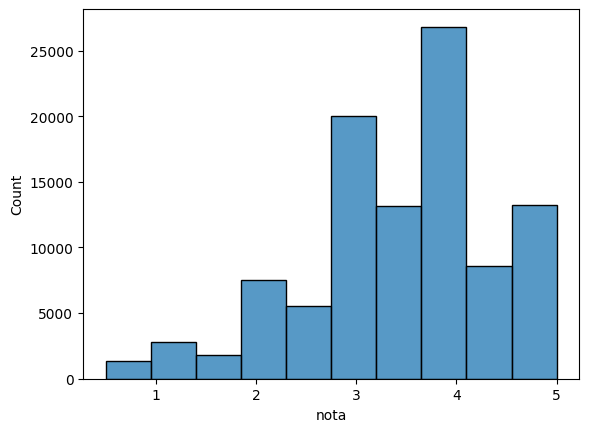

In [18]:
#Como podemos ver, o gráfico de dispersão das notas apresenta uma assimetria à esquerda
sns.histplot(data=notas['nota'], bins=10)

<Axes: ylabel='nota'>

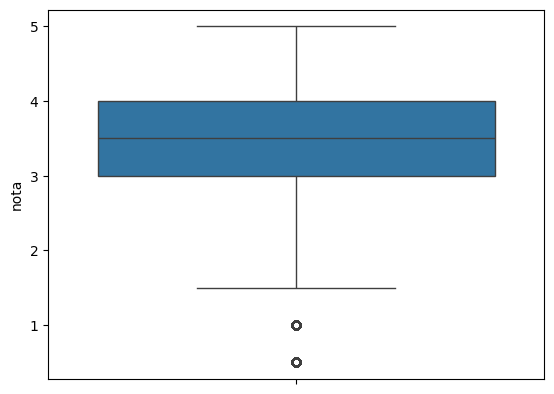

In [19]:
#No gráfico boxplot também podemos ver que a mediana está deslocada para a esquerda
sns.boxplot(data=notas['nota'])

In [20]:
#Primeiro, vamos agrupar as médias das notas por filme
medias_por_filme = notas.groupby('filmeId')['nota'].mean()
medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

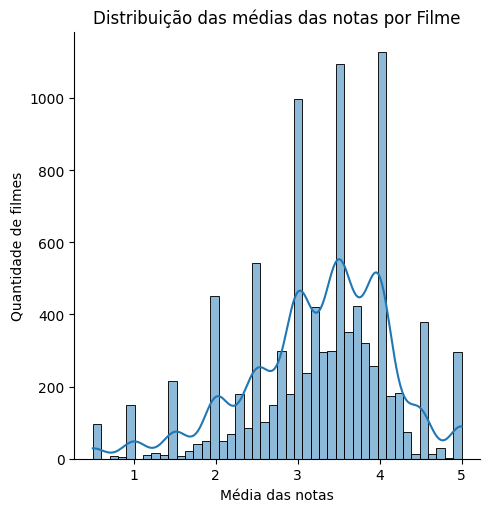

In [21]:
#Plotando um gráfico de distribuição
sns.displot(medias_por_filme, kde=True)
plt.title('Distribuição das médias das notas por Filme')
plt.xlabel('Média das notas')
plt.ylabel('Quantidade de filmes')
plt.show()

<Axes: ylabel='nota'>

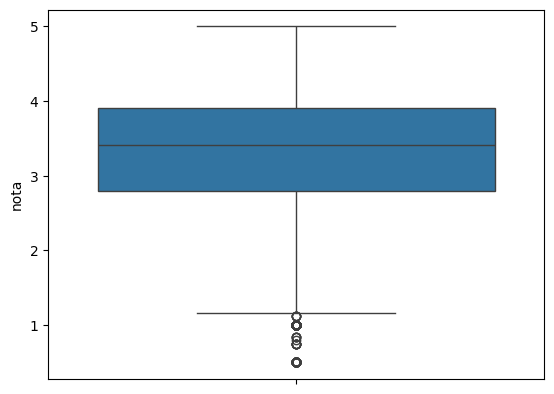

In [30]:
#Plotando o boxplot
sns.boxplot(medias_por_filme)